<a href="https://colab.research.google.com/github/jfaraudo/MonteCarlo-example/blob/master/Markov_chain_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple calculation of Pi using direct Monte Carlo**

The algorithm is an implementation of Algorithm 1.1 from the book by W Krauth "Statistical Mechanics Algorithms and Computations".

This is a classical example of a direct sampling Monte Carlo calculation


Enter number of points for Monte Carlo estimate of Pi?
>10000

--------------

Result

Number of points inside square of area 4: 10000
Number of points inside unit circle: 7861
Ratio unit circle/full square= 78.61 % 

Estimated Area of unit circle = 0.7861 x 4 = 3.1444
Exact value (pi): 3.141592653589793


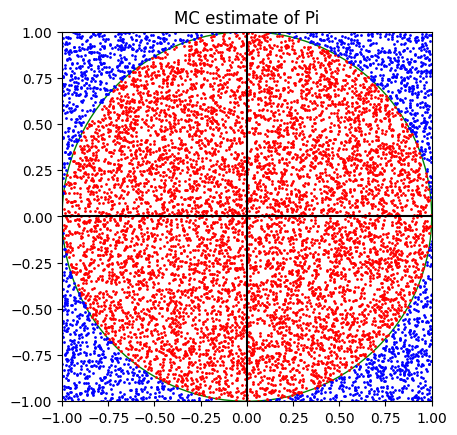

In [5]:
# Here we import the mathematical library and the plots library
import numpy as np
import matplotlib.pyplot as plt

# input total number of random points
total_random_points = int(input("\nEnter number of points for Monte Carlo estimate of Pi?\n>"))

# Init counter of number of points inside unit circle and inside unit square
inside_circle = 0
inside_square = 0

#Create list to save x,y of points inside circle to be shown in the graph
xc = []
yc = []

#Create list to save x,y of points inside square but outside circle to be shown in the graph
xs = []
ys = []

#---------------------------------------------------
#Calculation

#Initial position
x=1.0
y=1.0

while (inside_square<total_random_points):

    #generate a random point
    x = np.random.uniform(-1.0, 1.0)
    y = np.random.uniform(-1.0, 1.0)

    #Update number of points inside square
    inside_square = inside_square +1

    #check whether it is inside circle (count and save for representation)
    if x**2 + y**2 <= 1.0:
        inside_circle = inside_circle +1
        xc.append(x)
        yc.append(y)
    else:
        xs.append(x)
        ys.append(y)

#---------------------------------------------------

# Statistics

# Number of points inside circle as compared with total
circle_ratio = inside_circle /  inside_square

#Number of points inside circle as compared with those inside the total square with area 4.0
pi_approx = 4.0*circle_ratio

# Print output
print('\n--------------')
print('\nResult')
print('\nNumber of points inside square of area 4:', inside_square)
print('Number of points inside unit circle:',inside_circle,)
print('Ratio unit circle/full square=',circle_ratio*100,'% \n')
print('Estimated Area of unit circle =',circle_ratio,'x 4 =', pi_approx)
print('Exact value (pi):', np.pi)

#Plot

#create plot with the data and title
plt.plot(xc,yc,'ro',markersize=1.0)
plt.plot(xs,ys,'bo',markersize=1.0)
plt.title('MC estimate of Pi')

#Create axis with equal aspect ratio in both axis
ax = plt.gca()
ax.set_aspect('equal', 'box')

#Set axis limits
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))

#Add a circle
circle_plot = plt.Circle( ( 0, 0 ), 1, color='green', linewidth=1.0, fill=False)
ax.add_artist(circle_plot)

#add black lines to show the different quadrants
plt.axhline(0, color='black')
plt.axvline(0, color='black')
#Show plot in screen
plt.show()